<a href="https://colab.research.google.com/github/Athotakb88/CodSoft-DataScience-Internship/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Card Fraud Detection using Machine Learning

Internship Project – CodSoft Data Science

1. Problem Statement

Credit card fraud detection aims to identify fraudulent transactions among a large number of genuine transactions using machine learning classification models.
The challenge is that fraud cases are very rare, causing class imbalance.


Dataset Understanding

Typical credit card datasets contain:

Features: Transaction amount, time, anonymized variables (V1–V28)

Target column:

0 → Genuine transaction

1 → Fraudulent transaction

📌 Key issue: Fraud cases are usually < 1% of data.

In [7]:
#Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE


In [1]:
!ls /content

creditcard.csv  sample_data/


In [3]:
!head /content/creditcard.csv


"Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,"0"
0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.4639170410

Load Dataset
📌 Description

Read the CSV file and display initial rows to understand the dataset.

In [8]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#Dataset Exploration
data.shape


(284807, 31)

In [10]:
#Check Missing Values
data.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
#Class Distribution
data['Class'].value_counts()


,count
Class,
0,284315
1,492


0 → Genuine transactions

1 → Fraudulent transactions

Dataset is highly imbalanced

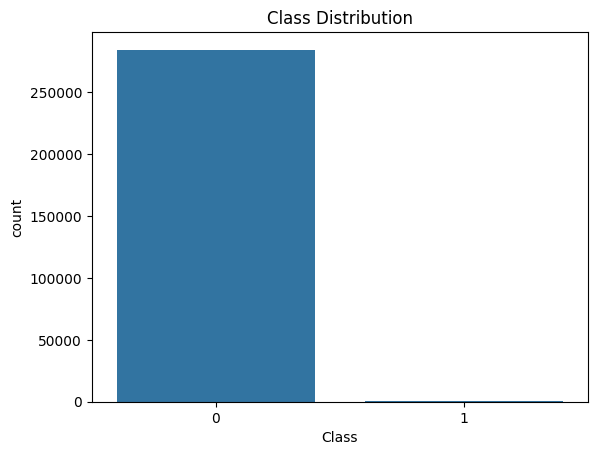

In [12]:
#Class Imbalance Visualization
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.show()


Feature Scaling (Normalization)
📌 Why?

Transaction Amount values vary widely and must be normalized.

In [13]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])


In [14]:
#Feature & Target Separation
X = data.drop('Class', axis=1)
y = data['Class']


Handle Class Imbalance using SMOTE
📌 Description

SMOTE creates synthetic fraud samples to balance the dataset.

In [15]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


Check New Distribution

In [16]:
pd.Series(y_resampled).value_counts()


,count
Class,
0,284315
1,284315


Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42
)


Model 1 – Logistic Regression
📌 Description

A baseline classification model.

In [18]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Prediction

In [19]:
y_pred_lr = lr.predict(X_test)


Evaluation

In [20]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



Model 2 – Random Forest (Better Performance)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


Prediction

In [ ]:
y_pred_rf = rf.predict(X_test)


Evaluation

In [ ]:
  print(classification_report(y_test, y_pred_rf))


Confusion Matrix Visualization

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Model Comparison (For Explanation)
Model	              Precision	        Recall	           F1-Score
Logistic Regression	Moderate	         Good	             Moderate
Random Forest	         High	          Very High	           Best

📌 Random Forest performs better for fraud detection